<a href="https://colab.research.google.com/github/dAn-solution/knocks100/blob/main/knock09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# マウント実行
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
#サポートパッチのインポート
from google.colab.patches import cv2_imshow

import cv2

### 081画像データの読み込み

In [ ]:
#画像のインポート
import cv2
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/colab/img/img01.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [5]:
height, width = img.shape[:2]
print("画像幅：　" + str(width))
print("画像高さ：　" + str(height))

画像幅：　1920
画像高さ：　1440


### 082映像データの読み込み

In [9]:
# preparation
from google.colab.patches import cv2_imshow
import cv2

# 映像データ取得
cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/colab/mov/mov01.avi")
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print("画像幅：　" + str(width))
print("画像高さ：　" + str(height))
print("総フレーム数：　" + str(count))
print("FPS: " + str(fps))

# 出力
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2_imshow(img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

画像幅：　1920.0
画像高さ：　1440.0
総フレーム数：　401.0
FPS: 30.0


### 083映像を画像に分割し保存

In [10]:
cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/colab/mov/mov01.avi")
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        # cv2_imshow(frame)
        filepath = "/content/drive/MyDrive/Colab Notebooks/colab/snapshot/snapshot_" + str(num) + ".jpg"
        cv2.imwrite(filepath, frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    num += 1
    if num > count:
        break
cap.release()
cv2.destroyAllWindows()

### 084画像内のどこに人がいるか検出

In [11]:
# gpu 確認
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import cv2

# preparation
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

# 検出
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/colab/img/img01.jpg", cv2.IMREAD_UNCHANGED)
# img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/colab/img/img01.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
human, r = hog.detectMultiScale(gray, **hogParams)
if (len(human)>0):
    for (x, y, w, h) in human:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 3)
cv2_imshow(img)
cv2.waitKey(0)

### 085画像内の人の顔を検出

In [13]:
import cv2

# preparation
cascade_file = "/content/drive/MyDrive/Colab Notebooks/colab/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 検出
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/colab/img/img02.jpg", cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(gray, minSize=(50, 50))

# 検出した顔に印を付ける
for (x, y, w, h) in face_list:
    color = (0, 0, 255)
    pen_w = 3
    cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness = pen_w)
# GitHubにアップするためにcv2_show(img)はコメント
# cv2_imshow(img)
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/colab/temp085.jpg", img)
cv2.waitKey(0)

-1

### 086画像内の人がどこに顔を向けているか検出

In [ ]:
import cv2
import dlib
import math

# preparation
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/colab/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# 検出
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/colab/img/img02.jpg")
dets = detector(img, 1)

for k, d in enumerate(dets):
    shape = predictor(img, d)

    # 顔領域の表示
    color_f = (0, 0, 255)
    color_l_out = (255, 0, 0)
    color_l_in = (0, 255, 0)
    line_w = 3
    circle_r = 3
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

    # 重心を導出する箱を用意
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0
    gy_out = 0
    gx_in = 0
    gy_in = 0
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        # print("顔器官No.{} 座標位置： ({}, {})".format(shape_point_count, shape_point.x, shape_point.y))
        # 器官ごとに描画
        if shape_point_count<num_of_points_out:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_out, line_w)
            gx_out = gx_out + shape_point.x/num_of_points_out
            gy_out = gy_out + shape_point.y/num_of_points_out
        else:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_in, line_w)
            gx_in = gx_in + shape_point.x/num_of_points_in
            gy_in = gy_in + shape_point.y/num_of_points_in
    # 重心位置を描画
    cv2.circle(img, (int(gx_out), int(gy_out)), circle_r,(0,0,255), line_w)
    cv2.circle(img, (int(gx_in), int(gy_in)), circle_r,(0,0,0), line_w)

    # 顔の方位を計算
    theta = math.asin(2*(gx_in-gx_out)/(d.right()-d.left()))
    radian = theta*180/math.pi
    print("顔方位：{} (角度：{}度)".format(theta, radian))

    # 顔方位を表示
    if radian<0:
        textPrefix = "    left "
    else:
        textPrefix = "    right "
    textShow = textPrefix + str(round(abs(radian), 1)) + "  deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)

cv2_imshow(img)
cv2.waitKey(0)

### 087検出したデータを結合しタイムラプスを作成

In [17]:
import cv2

print("タイムラプス生成を開始します")

# 映像取得
cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/colab/mov/mov01.avi")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

# タイムプラス作成
movie_name = "/content/drive/MyDrive/Colab Notebooks/colab/timelapse.avi"
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter(movie_name, fourcc, 30, (width,height))

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)

            video.write(frame)
    else:
        break
    num += 1
video.release()
cap.release()
cv2.destroyAllWindows()
print("タイムラプス生成を終了しました")

タイムラプス生成を開始します
タイムラプス生成を終了しました


### 088全体像をグラフにして可視化する

In [18]:
import cv2
import pandas as pd

print("分析を開始します")

# 映像取得
cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/colab/mov/mov01.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

num = 0
list_df = pd.DataFrame(columns=['time','people'])
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps,len(human) ], index=list_df.columns)
            list_df = list_df.append( tmp_se, ignore_index=True)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
    num += 1
cap.release()
cv2.destroyAllWindows()
print("分析を終了しました")

分析を開始します
分析を終了しました


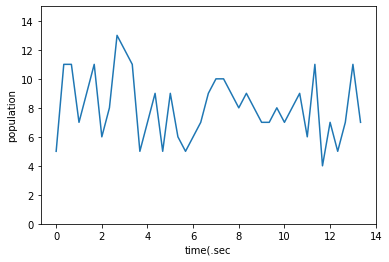

In [19]:
import matplotlib.pyplot as plt
plt.plot(list_df["time"], list_df["people"])
plt.xlabel("time(.sec")
plt.ylabel("population")
plt.ylim(0,15)
plt.show()

### 089人通りの変化をグラフ化する

In [20]:
import cv2
import pandas as pd

print("分析を開始します")

# 映像取得
cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/colab/mov/mov02.avi")
fps = cap.get(cv2.CAP_PROP_FPS)

# hog宣言 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'finalThreshold':5}

num = 0
list_df2 = pd.DataFrame( columns=['time','people'] )
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            tmp_se = pd.Series( [num/fps,len(human) ], index=list_df2.columns )
            list_df2 = list_df2.append( tmp_se, ignore_index=True )
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    else:
        break
    num += 1
cap.release()
cv2.destroyAllWindows()
print("分析を終了しました")

分析を開始します
分析を終了しました


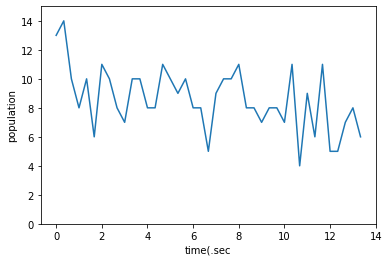

In [21]:
import matplotlib.pyplot as plt
plt.plot(list_df2["time"], list_df2["people"])
plt.xlabel("time(.sec")
plt.ylabel("population")
plt.ylim(0,15)
plt.show()

### 090移動平均を計算しノイズの影響を除去

In [22]:
import numpy as np
def moving_average(x, y):
    y_conv = np.convolve(y, np.ones(5)/float(5), mode='valid')
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
    return x_dat, y_conv

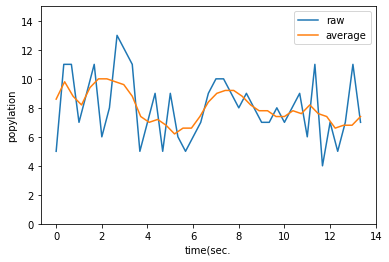

In [23]:
plt.plot(list_df["time"], list_df["people"], label="raw")
ma_x, ma_y = moving_average(list_df["time"], list_df["people"])
plt.plot(ma_x,ma_y, label="average")
plt.xlabel('time(sec.')
plt.ylabel('popylation')
plt.ylim(0,15)
plt.legend()
plt.show()

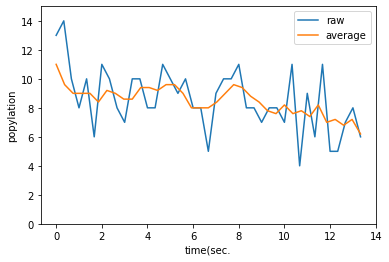

In [24]:
plt.plot(list_df2["time"], list_df2["people"], label="raw")
ma_x2, ma_y2 = moving_average(list_df2["time"], list_df2["people"])
plt.plot(ma_x2,ma_y2, label="average")
plt.xlabel('time(sec.')
plt.ylabel('popylation')
plt.ylim(0,15)
plt.legend()
plt.show()

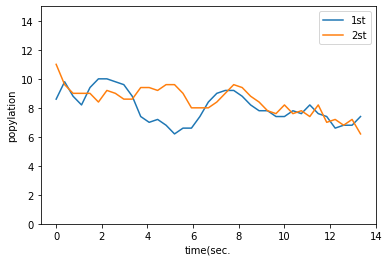

In [25]:
plt.plot(ma_x,ma_y, label="1st")
plt.plot(ma_x2,ma_y2, label="2st")
plt.xlabel('time(sec.')
plt.ylabel('popylation')
plt.ylim(0,15)
plt.legend()
plt.show()